# 📝 EDA Tests
---
Analyzing dataset for any imbalances and whatsoever.

In [1]:
import os

datapath = r'C:\Users\Melzarr\OneDrive\Desktop\THESIS\sp_multilabel_vggtc\data_collection\final_collection\final_data2'

In [2]:
import pandas as pd
import numpy as np
import json

firstdata = datapath + r'\data0_s40856.csv'

vgame0_df = pd.read_csv(firstdata)

In [3]:
vgame0_df.head(10)

,id,name,summary,genre_count,genre_list,genre_ids
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]"
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"['Simulator', 'Adventure']","[13, 31]"
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]"
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"['Shooter', 'Adventure']","[5, 31]"
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,['Role-playing (RPG)'],[12]
5,6,Baldur's Gate II: Shadows of Amn,Every World has conflict. Good and evil. Frien...,1,['Role-playing (RPG)'],[12]
6,7,Jagged Alliance,Desperately you are called to the island of Me...,4,"['Role-playing (RPG)', 'Strategy', 'Turn-based...","[12, 15, 16, 24]"
7,8,Jagged Alliance: Deadly Games,The enemy is on the run. One more mortar shell...,4,"['Role-playing (RPG)', 'Strategy', 'Turn-based...","[12, 15, 16, 24]"
8,9,Jagged Alliance 2,Jagged Alliance 2 is a perfect blend of strate...,5,"['Role-playing (RPG)', 'Strategy', 'Turn-based...","[12, 15, 16, 24, 31]"
9,10,Jade Empire: Special Edition,Step into the role of an aspiring martial-arts...,2,"['Role-playing (RPG)', 'Adventure']","[12, 31]"


## Genre Count Frequencies
---

In [20]:
vgame0_df.loc[vgame0_df['genre_count'] == 20]

,id,name,summary,genre_count,genre_list,genre_ids
3000,3229,Retro World,Retro World takes you on a fantastic journey t...,20,"['Point-and-click', 'Fighting', 'Shooter', 'Mu...","[2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,..."


1     16496
2     13461
3      7045
4      2786
5       828
6       186
7        39
8        10
9         2
10        2
20        1
Name: genre_count, dtype: int64
40856


<AxesSubplot: >

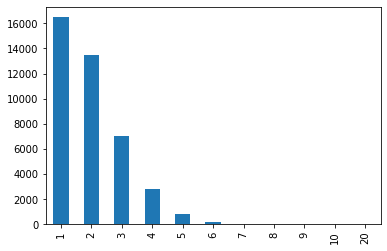

In [4]:
genrecount_freq = pd.value_counts(vgame0_df['genre_count'])
print(genrecount_freq)
print(genrecount_freq.sum())

genrecount_freq.plot(kind='bar')

In [5]:
type(genrecount_freq)

sum = 0
for i in genrecount_freq.index:
    print(f'{i} * {genrecount_freq[i]}')
    sum += i * genrecount_freq[i]
print(sum)

1 * 16496
2 * 13461
3 * 7045
4 * 2786
5 * 828
6 * 186
7 * 39
8 * 10
9 * 2
10 * 2
20 * 1
81364


## Testing `literal_eval()` and `explode()`
---
`literal_eval()` turns the stringified list to Pythonic list  
`explode()` used to separate tags in each game ids

In [6]:
from ast import literal_eval 

fullinfo_df = vgame0_df.copy()
fullinfo_df = fullinfo_df[["id", "summary", "genre_list"]]
fullinfo_df['genre_list'] = fullinfo_df['genre_list'].apply(literal_eval)
fullinfo_df

,id,summary,genre_list
0,1,The ultimate thief is back! Tread softly as yo...,"[Shooter, Simulator, Adventure]"
1,2,Thief is a first-person stealth game that like...,"[Simulator, Adventure]"
2,3,"In the third instalment of the Thief series, m...","[Shooter, Simulator, Adventure]"
3,4,There is a rising tide of fear in The City. Ha...,"[Shooter, Adventure]"
4,5,Baldur's Gate is a fantasy role-playing video ...,[Role-playing (RPG)]
...,...,...,...
40851,49994,"Get out the rod and reel, because the challeng...",[Sport]
40852,49995,Tech Deck Skateboarding challenges you to pull...,[Sport]
40853,49997,Can you trap the elusive line of energy that's...,[Puzzle]
40854,49998,David O'Leary's Total Soccer 2000 is a soccer ...,[Sport]


In [7]:
exploded_vgdf = fullinfo_df.explode('genre_list').reset_index(drop=True)
exploded_vgdf

,id,summary,genre_list
0,1,The ultimate thief is back! Tread softly as yo...,Shooter
1,1,The ultimate thief is back! Tread softly as yo...,Simulator
2,1,The ultimate thief is back! Tread softly as yo...,Adventure
3,2,Thief is a first-person stealth game that like...,Simulator
4,2,Thief is a first-person stealth game that like...,Adventure
...,...,...,...
81359,49994,"Get out the rod and reel, because the challeng...",Sport
81360,49995,Tech Deck Skateboarding challenges you to pull...,Sport
81361,49997,Can you trap the elusive line of energy that's...,Puzzle
81362,49998,David O'Leary's Total Soccer 2000 is a soccer ...,Sport


## Count Genre Types
---

Adventure                     12958
Indie                         11677
Strategy                       7325
Role-playing (RPG)             6557
Simulator                      6475
Shooter                        6332
Puzzle                         4812
Sport                          4684
Platform                       4469
Arcade                         3572
Racing                         2784
Fighting                       2095
Hack and slash/Beat 'em up     1365
Real Time Strategy (RTS)       1102
Turn-based strategy (TBS)      1095
Point-and-click                 865
Tactical                        858
Music                           701
Visual Novel                    543
Quiz/Trivia                     440
Card & Board Game               384
Pinball                         246
MOBA                             25
Name: genre_list, dtype: int64


<AxesSubplot: >

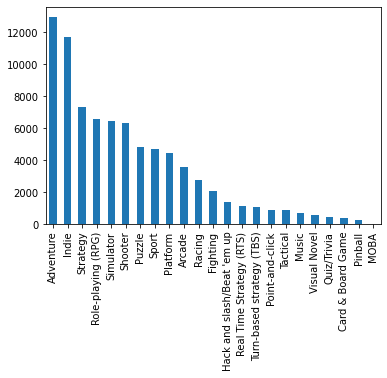

In [8]:
genretype_count = exploded_vgdf['genre_list'].value_counts()
print(genretype_count)

genretype_count.plot(kind='bar')

## EDA Proper (hopefully)
---

In [9]:
fullinfo_df.head(10)

,id,summary,genre_list
0,1,The ultimate thief is back! Tread softly as yo...,"[Shooter, Simulator, Adventure]"
1,2,Thief is a first-person stealth game that like...,"[Simulator, Adventure]"
2,3,"In the third instalment of the Thief series, m...","[Shooter, Simulator, Adventure]"
3,4,There is a rising tide of fear in The City. Ha...,"[Shooter, Adventure]"
4,5,Baldur's Gate is a fantasy role-playing video ...,[Role-playing (RPG)]
5,6,Every World has conflict. Good and evil. Frien...,[Role-playing (RPG)]
6,7,Desperately you are called to the island of Me...,"[Role-playing (RPG), Strategy, Turn-based stra..."
7,8,The enemy is on the run. One more mortar shell...,"[Role-playing (RPG), Strategy, Turn-based stra..."
8,9,Jagged Alliance 2 is a perfect blend of strate...,"[Role-playing (RPG), Strategy, Turn-based stra..."
9,10,Step into the role of an aspiring martial-arts...,"[Role-playing (RPG), Adventure]"


## Check word count for summary
---

count    40856.000000
mean        74.705943
std         67.436670
min          1.000000
25%         32.000000
50%         55.000000
75%         98.000000
max       1632.000000
dtype: float64

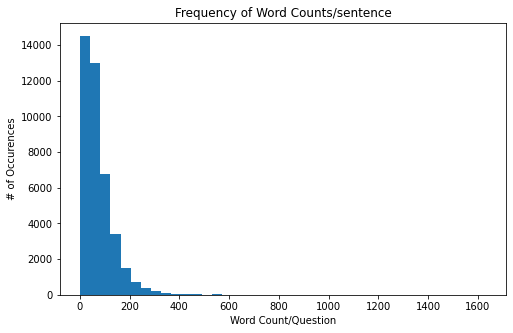

In [10]:
import matplotlib.pyplot as plt

summary_series = fullinfo_df['summary']
word_count = [len(sentence.split()) for sentence in summary_series]

display(pd.Series(word_count).describe())

# Plot the distribution
plt.figure(figsize=[8,5])
plt.hist(word_count, bins = 40)
plt.xlabel('Word Count/Question')
plt.ylabel('# of Occurences')
plt.title("Frequency of Word Counts/sentence")
plt.show()

Finding the one with apparently 1 word count 👁👄👁. (might have to filter these out, idk pa lmao)

In [11]:
smallcount_df = fullinfo_df[fullinfo_df['summary'].apply(lambda x: len(x.split()) <= 5)]
len(smallcount_df)

smallcount_df

,id,summary,genre_list
258,269,Another mobile Deer Hunter.,"[Shooter, Simulator, Sport]"
608,632,A Chessmaster game from 1998.,"[Sport, Strategy]"
715,747,A flight simulator.,"[Shooter, Simulator]"
1929,2026,Amazon Exclusive Steel Book Edition,"[Role-playing (RPG), Indie]"
2153,2309,Anime Melee,[Adventure]
...,...,...,...
38880,47530,Early Japanese open-world RPG,[Role-playing (RPG)]
38999,47709,"Simulates baby care, or something.",[Simulator]
39709,48561,Mother 25th Anniversary Edition,"[Role-playing (RPG), Adventure]"
40626,49719,Japanese festival RPG.,"[Role-playing (RPG), Card & Board Game]"


## Multilabel Binarization
---

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [13]:
fullinfo_df['genre_list']

0        [Shooter, Simulator, Adventure]
1                 [Simulator, Adventure]
2        [Shooter, Simulator, Adventure]
3                   [Shooter, Adventure]
4                   [Role-playing (RPG)]
                      ...               
40851                            [Sport]
40852                            [Sport]
40853                           [Puzzle]
40854                            [Sport]
40855                           [Puzzle]
Name: genre_list, Length: 40856, dtype: object

In [14]:
yt = mlb.fit_transform(fullinfo_df['genre_list'])
yt.shape

(40856, 23)

In [15]:
# Getting a sense of how the tags data looks like
print(yt[0])
print(mlb.inverse_transform(yt[0].reshape(1,-1)))
print(mlb.classes_)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
[('Adventure', 'Shooter', 'Simulator')]
['Adventure' 'Arcade' 'Card & Board Game' 'Fighting'
 "Hack and slash/Beat 'em up" 'Indie' 'MOBA' 'Music' 'Pinball' 'Platform'
 'Point-and-click' 'Puzzle' 'Quiz/Trivia' 'Racing'
 'Real Time Strategy (RTS)' 'Role-playing (RPG)' 'Shooter' 'Simulator'
 'Sport' 'Strategy' 'Tactical' 'Turn-based strategy (TBS)' 'Visual Novel']


## Clean text
---

In [16]:
import re
from bs4 import BeautifulSoup

def pre_process(text):

  text = BeautifulSoup(text).get_text()
  
  # fetch alphabetic characters
  text = re.sub("[^a-zA-Z]", " ", text)

  # convert text to lower case
  text = text.lower()

  # split text into tokens to remove whitespaces
  tokens = text.split()

  return " ".join(tokens)

In [17]:
fullinfo_df['clean_summary'] = fullinfo_df['summary'].apply(pre_process)

c:\Users\Melzarr\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
c:\Users\Melzarr\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [18]:
fullinfo_df.to_csv('cleaned_data_test.csv', index=False)